In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [34]:
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

# color my grid
def color_grid(**argv):
    # remove local variables from input dict
    numx = argv['numx']
    numy = argv['numy']
    ax1 = argv['axis']
    num_hazards = argv['num_hazards']

    # produce range for plot
    z = np.round(10*np.random.rand(numx,numy))
    
    # default tile num = 0
    z = 0*np.ones((numx,numy)) 
    
    # hazards = 1
    ind = np.random.randint(1,numx,num_hazards)
    ind2 = np.random.randint(1,numy,num_hazards)
    ind3 = np.asarray([ind,ind2]).T
    for i in range(np.shape(ind3)[0]): 
        s = ind3[i]
        a = s[0]
        b = s[1]
        z[a][b] = 1
    
    # goal num = 2
    z[numx-1][numy-1] = 2
    
    # agent placement = 3
    z[numx-1][0] = 3
    
    # plot grid

    vmax = 3.0
    cmap = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, [0.9,0.9,0.9]),
                                                    (1 / vmax, [1,0.5,0]),
                                                    (2 / vmax, 'lime'),
                                                    (3 / vmax, 'blue')]
                                        )
    
    ax1.pcolormesh(z,edgecolors = 'k',linewidth = 0.01,cmap = cmap)
    
    # clean up plot
    ax1.axis('off')
    ax1.set_xlim(-0.1,numy +0.1 + 0.1);
    ax1.set_ylim(-0.1,numx +1 + 0.1);

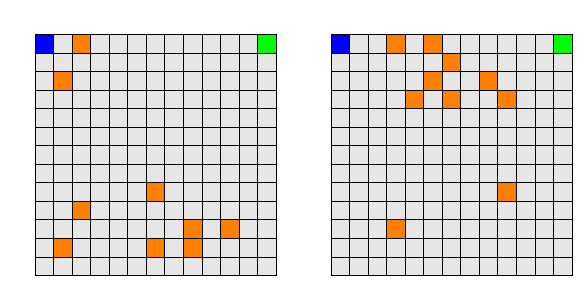

In [35]:
fig1 = plt.figure(figsize = (7,7))
ax1 = fig1.add_subplot(121, aspect='equal')
ax2 = fig1.add_subplot(122, aspect='equal')

color_grid(numx = 13,numy = 13,axis = ax1,num_hazards = 10)
color_grid(numx = 13,numy = 13,axis = ax2,num_hazards = 10)

In [38]:
s.to_csv('big_maze.csv',header = None,index = False)

In [5]:
%matplotlib nbagg

<IPython.core.display.Javascript object>


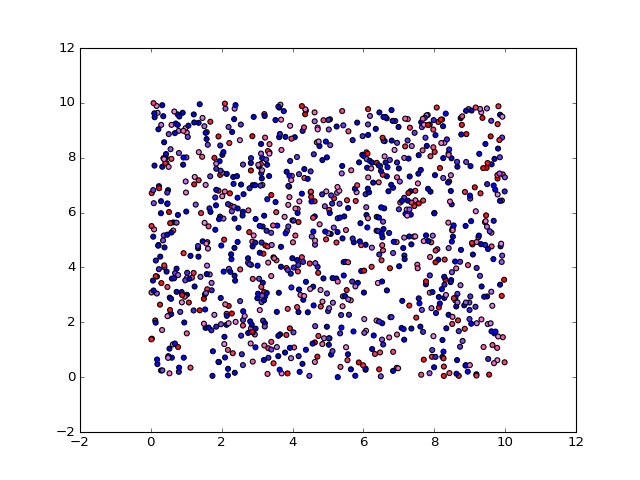

In [7]:
import matplotlib.colors as mcolors

def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

c = mcolors.ColorConverter().to_rgb
rvb = make_colormap(
    [c('red'), c('violet'), 0.33, c('violet'), c('blue'), 0.66, c('blue')])


N = 1000
array_dg = np.random.uniform(0, 10, size=(N, 2))
colors = np.random.uniform(-2, 2, size=(N,))
plt.scatter(array_dg[:, 0], array_dg[:, 1], c=colors, cmap=rvb)
# plt.colorbar()
# plt.show()